# Practice for Data Cleaning with Pandas

## Overview:

#### Outcomes at the Austin Animal Center

Austin Animal Center is the municipal shelter for Austin, TX. You are a consulting data scientist helping the shelter understand the factors contributing to various final outcomes of shelitered animals (adoption, euthanasia, etc.). They want a tool that will use this information to automatically flag animals that are at risk of ending up being euthanised. You have been provided with data from the following source:

Data source: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238


Before conducting EDA and model building, you will need to clean your data. This will require you to:


- Handle missing data, and recognize when different strategies for handling missing data would be appropriate
- Deal with duplicate data
- Use string vectorized methods to transform object-type columns
- Use DataFrame vectorized methods to apply custom transformations to data

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

1. Load the animal center outcomes data as `df`.

In [2]:
# your code here
df = pd.read_csv('Austin_Animal_Center_Outcomes_022822.csv')

2. Inspect the head.

In [3]:
# your code here
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


3. Get information on columns: null count and data types in DataFrame

In [4]:
# Check it out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137100 entries, 0 to 137099
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         137100 non-null  object
 1   Name              96098 non-null   object
 2   DateTime          137100 non-null  object
 3   MonthYear         137100 non-null  object
 4   Date of Birth     137100 non-null  object
 5   Outcome Type      137076 non-null  object
 6   Outcome Subtype   62656 non-null   object
 7   Animal Type       137100 non-null  object
 8   Sex upon Outcome  137098 non-null  object
 9   Age upon Outcome  137095 non-null  object
 10  Breed             137100 non-null  object
 11  Color             137100 non-null  object
dtypes: object(12)
memory usage: 12.6+ MB


4. `DateTime` and `Date of Birth` are dtype `object`. Convert them to an appropriate data type.

In [5]:
# your code here
df['DateTime']= pd.to_datetime(df['DateTime'])
df['Date of Birth']= pd.to_datetime(df['Date of Birth'])


/tmp/ipykernel_92831/2556434359.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime']= pd.to_datetime(df['DateTime'])


5. The `Outcome Subtype` has a lot of nulls (more than half). It's not reasonable to impute these many missing values with a simple imputation strategy. Drop this feature.

In [6]:
# your code here
df.drop(columns='Outcome Subtype', inplace=True)


# outcome subtype should no longer be in the list of columns
print(df.columns)

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth',
       'Outcome Type', 'Animal Type', 'Sex upon Outcome', 'Age upon Outcome',
       'Breed', 'Color'],
      dtype='object')


6. Return a dataframe with all duplicated rows in the dataset.

In [7]:
# your code here
df[df.duplicated()]

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
29,A698049,Luigi,2015-03-16 14:50:00,Mar 2015,2014-06-05,Transfer,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White
237,A698049,Luigi,2015-03-16 14:50:00,Mar 2015,2014-06-05,Transfer,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White
395,A698049,Luigi,2015-03-16 14:50:00,Mar 2015,2014-06-05,Transfer,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White
9087,A815987,Princess,2020-04-13 16:56:00,Apr 2020,2019-04-02,Return to Owner,Dog,Intact Female,1 year,Cairn Terrier,White/Brown
16881,A761936,NaN,2017-11-16 12:54:00,Nov 2017,2017-01-12,Transfer,Dog,Intact Male,10 months,Scottish Terrier Mix,Brown Brindle
24054,A783234,Princess,2019-01-13 16:39:00,Jan 2019,2016-10-27,Rto-Adopt,Dog,Spayed Female,2 years,Collie Smooth/Pointer,Brown
50932,A682781,NaN,2014-07-03 09:00:00,Jul 2014,2013-01-02,Transfer,Cat,Neutered Male,1 year,Domestic Shorthair Mix,White/Black
56950,A683782,NaN,2014-07-16 09:00:00,Jul 2014,2014-02-15,Transfer,Cat,Neutered Male,4 months,Domestic Shorthair Mix,Brown Tabby
65106,A686827,NaN,2014-08-28 09:00:00,Aug 2014,2012-02-27,Transfer,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Calico
75009,A755687,NaN,2017-08-07 13:50:00,Aug 2017,2014-08-07,Disposal,Other,Unknown,3 years,Bat Mix,Brown


7. Remove all duplicates from the dataframe.

In [8]:
# your code here
df = df.drop_duplicates()


Age has a few nulls. Notice that the dtype for the column is object and the entries are strings:

In [9]:
# run this cell without changes
print(df['Age upon Outcome'].isna().sum()) # there are 5 NaNs
print(df['Age upon Outcome'].dtype)
print(df['Age upon Outcome'].head())

5
object
0     2 years
1      1 year
2      1 year
3    4 months
4      6 days
Name: Age upon Outcome, dtype: object


The ages are strings with the number and a particular unit of time (days, months, or years). We need to clean this up.

8. Split the number and unit and put these into two new columns named `Age Number` and `Age Unit` respectively.

In [10]:
# your code here
df  = df.dropna()

df['Age Number'] = df['Age upon Outcome'].str.split(' ').str[0]
df['Age Unit'] = df['Age upon Outcome'].str.split(' ').str[1]

print(df.columns)

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth',
       'Outcome Type', 'Animal Type', 'Sex upon Outcome', 'Age upon Outcome',
       'Breed', 'Color', 'Age Number', 'Age Unit'],
      dtype='object')


9. Let's convert our Ages to be in units of days. First convert the `Age Unit` column to its corresponding number in days. We have provide the dictionary for unit conversion:

In [11]:
# Providing this dictionary to capture age values in # days (not perfect)
age_vals = {
    'years': 365,
    'year': 365,
    'months': 30,
    'month': 30,
    'weeks': 7,
    'week': 7,
    'days': 1,
    'day': 1
}

# your code here
df['Age Unit'] = df['Age Unit'].map(age_vals)

print(df['Age Unit'].head())


0    365
1    365
3     30
5    365
6    365
Name: Age Unit, dtype: int64


10. Convert the `Age Number` column to 'Int16' datatype. Then express the `Age Upon Outcome` in days using the `Age Number` and converted `Age Unit` columns.

In [12]:
# your code here
df['Age Number'] = df['Age Number'].astype('Int16')

df['Age upon Outcome'] = df['Age Number'] * df['Age Unit']

print(df['Age upon Outcome'].head())


0     730
1     365
3     120
5    2555
6     730
Name: Age upon Outcome, dtype: Int64


11. Plot a histogram of `Age upon Outcome` along with median of the column.

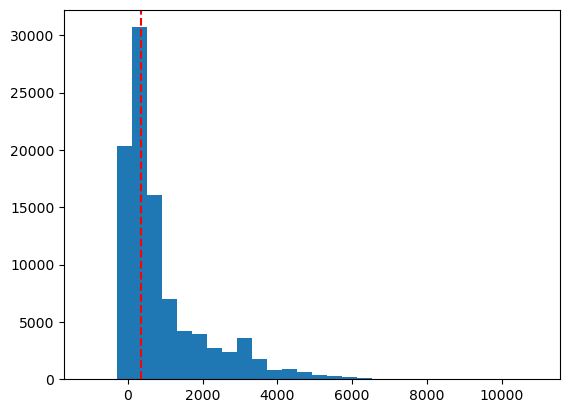

In [13]:
# your code here
fig, ax = plt.subplots()
ax.hist(df['Age upon Outcome'], bins=30)
ax.axvline(df['Age upon Outcome'].median(), c='red', linestyle='--')
plt.show()

12. The median looks to be a measure of central tendency. Impute `Age upon Outcome' with the median.

In [15]:
# your code here
df['Age upon Outcome'] = df['Age upon Outcome'].fillna(df['Age upon Outcome'].median())

df['Age upon Outcome'].isna().sum()

np.int64(0)

13. The string cleaning and statistical imputation did work OK but in this case there was a much better option. We actually can compute the `Age upon Outcome` from two other columns in the dataset: `DateTime` and `Date of Birth`. Neither of these columns have nulls. Take the difference of the two columns, convert to days (use the vectorized dt.days attribute), and assign the resulting series to `Age upon Outcome`.

In [16]:
# your code here
df['Age upon Outcome'] = (df['DateTime'] - df['Date of Birth']).dt.days

print("There are " + str(df['Age upon Outcome'].isna().sum()) + " missing values.")
print(df['Age upon Outcome'].head())

There are 0 missing values.
0     736
1     371
3     128
5    2752
6     797
Name: Age upon Outcome, dtype: int64


There was no guess work that was required to impute the values in the `Age upon Outcome` value.

14. Use `.map()` to turn the Sex upon Outcome column into a category with three values: Fixed, Intact, or Unknown. We have provided you a function `fixed_mapper` that transforms the distinct categories to our desired three values (Fixed, Intact, Unknown). This function will turn any NaNs to category Unknown -- explicitly making missing values its own category. Create a new column `Grouped Sex upon Outcome` that results from transforming `Sex upon Outcome` with `fixed_mapper`:

In [17]:
# run cell without changes

# print Categories in column
print(df['Sex upon Outcome'].unique())

# Provided function
def fixed_mapper(status):
    '''
    Takes in the current status of animals and outputs whether they have been fixed
    '''
    if status in ['Neutered Male', 'Spayed Female']:
        return 'Fixed'
    elif status in ['Intact Male', 'Intact Female']:
        return 'Intact'
    else:
        return 'Unknown'

['Neutered Male' 'Spayed Female' 'Intact Female' 'Intact Male' 'Unknown']


In [18]:
# Your code here
df['Grouped Sex upon Outcome'] = df['Sex upon Outcome'].map(fixed_mapper)

df[['Grouped Sex upon Outcome']].head()

,Grouped Sex upon Outcome
0,Fixed
1,Fixed
3,Fixed
5,Fixed
6,Fixed


15. Create a bar graph to display the counts in each category for `Grouped Sex upon Outcome`.

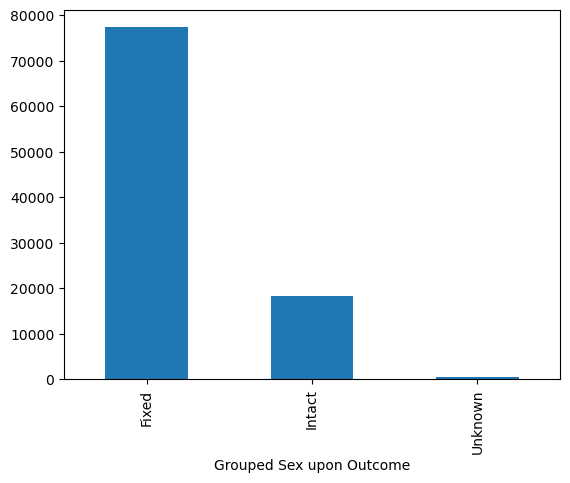

In [19]:
# your code here
df['Grouped Sex upon Outcome'].value_counts().plot(kind='bar');

16. `Outcome Type` is the target we are trying to predict. Count the number of nulls here:

In [20]:
# Your code here
df['Outcome Type'].isna().sum()

np.int64(0)

17. Drop all rows containing nulls in the `Outcome Type` column.

In [21]:
# Your code here
df.dropna(subset=['Outcome Type'], inplace=True)

Printing nulls in the dataset now:

In [22]:
# Sanity Check. Run cell without changes.
df.isna().sum()

Animal ID                   0
Name                        0
DateTime                    0
MonthYear                   0
Date of Birth               0
Outcome Type                0
Animal Type                 0
Sex upon Outcome            0
Age upon Outcome            0
Breed                       0
Color                       0
Age Number                  0
Age Unit                    0
Grouped Sex upon Outcome    0
dtype: int64

18. There are a lot of nulls in the `Name` column. While the exact name of an animal might not matter too much, maybe whether the animal has a name might indicate whether it was owned before. This might conceivably impact outcome for adoption.

Thus, build a binary categorical variable that indicates whether a name is missing -- i.e. an indicator for whether a value is null or not. This should be a new column `Name Missing`.

In [23]:
# Your code here
df['Name Missing'] = df['Name'].isna()
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Age Number,Age Unit,Grouped Sex upon Outcome,Name Missing
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,Cat,Neutered Male,736,Domestic Shorthair Mix,Brown Tabby/White,2,365,Fixed,False
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,Dog,Neutered Male,371,Chihuahua Shorthair Mix,White/Brown,1,365,Fixed,False
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,Dog,Neutered Male,128,Anatol Shepherd/Labrador Retriever,Buff,4,30,Fixed,False
5,A659412,Princess,2020-10-05 14:37:00,Oct 2020,2013-03-24,Adoption,Dog,Spayed Female,2752,Chihuahua Shorthair Mix,Brown,7,365,Fixed,False
6,A814515,Quentin,2020-05-06 07:59:00,May 2020,2018-03-01,Adoption,Dog,Neutered Male,797,American Foxhound/Labrador Retriever,White/Brown,2,365,Fixed,False


19. Create a new dataframe `clean_df` where all columns with NaNs have been dropped:

In [24]:
# your code here
df_clean = df.dropna(axis = 1)

20. Print info on the cleaned dataframe and save the cleaned dataframe to a file `cleaned_animal_data.csv`.

In [26]:
# your code here
print(df_clean.info())

df_clean.to_csv('cleaned_animal_data.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 96067 entries, 0 to 137099
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Animal ID                 96067 non-null  object        
 1   Name                      96067 non-null  object        
 2   DateTime                  96067 non-null  datetime64[ns]
 3   MonthYear                 96067 non-null  object        
 4   Date of Birth             96067 non-null  datetime64[ns]
 5   Outcome Type              96067 non-null  object        
 6   Animal Type               96067 non-null  object        
 7   Sex upon Outcome          96067 non-null  object        
 8   Age upon Outcome          96067 non-null  int64         
 9   Breed                     96067 non-null  object        
 10  Color                     96067 non-null  object        
 11  Age Number                96067 non-null  Int16         
 12  Age Unit              